In [1]:
pip install pygad>=2.8.0

In [2]:
import pygad
print(pygad.__version__)

2.16.0


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# import the libraries :
from keras.layers import *
from keras.models import *
from numpy import asarray
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# handling the warning :
import warnings
def warn(*args, **kwargs): pass
warnings.warn = warn

In [5]:
# read the dataset and find the train, test set size : ws = 2

def read_data(file_path):
    data = pd.read_csv(file_path)
    # drop all the infinite values :
    data = data.dropna()
    data = data.values
    #data = get_the_modified_dataset(file_path,ws,data)
    n = data.shape[1] - 1
    x = data[:,0:n]
    y = data[:,n]

    return x,y

file_path = './gdrive/My Drive/MSC Thesis ROOT FOLDER/MSC_THESIS_NEW_START/prev_features_train_9.csv'
X_train,y_train = read_data(file_path)
file_path = './gdrive/My Drive/MSC Thesis ROOT FOLDER/MSC_THESIS_NEW_START/prev_features_test_9.csv'
X_test,y_test = read_data(file_path)

# perform normalization :
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(27001, 75) (27001,)
(14090, 75) (14090,)


In [6]:
print('without undersampling : ')
print('Train residue statistics : ')
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print( 'positive class : ' , np.asarray((counts_elements)[1]) )
print( 'negative class : ' , np.asarray((counts_elements)[0]) )
print('positive ratio : negative ratio ' , str( ( (counts_elements)[1] / (counts_elements)[0] ) * 100 ) , ' : ', str( ( (counts_elements)[0] / (counts_elements)[0] ) * 100 ) )

print('Test residue statistics : ')
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print( 'positive class : ' , np.asarray((counts_elements)[1]) )
print( 'negative class : ' , np.asarray((counts_elements)[0]) )
print('positive ratio : negative ratio ' , str( ( (counts_elements)[1] / (counts_elements)[0] ) * 100 ) , ' : ', str( ( (counts_elements)[0] / (counts_elements)[0] ) * 100 ) )


without undersampling : 
Train residue statistics : 
positive class :  1013
negative class :  25988
positive ratio : negative ratio  3.8979529013390795  :  100.0
Test residue statistics : 
positive class :  507
negative class :  13583
positive ratio : negative ratio  3.7326069351395126  :  100.0


In [7]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42,replacement=True)
rus_X_train,rus_y_train = rus.fit_resample(X_train,y_train)

print('with undersampling : ')
print('Train residue statistics : ')
unique_elements, counts_elements = np.unique(rus_y_train, return_counts=True)
print( 'positive class : ' , np.asarray((counts_elements)[1]) )
print( 'negative class : ' , np.asarray((counts_elements)[0]) )
print('positive ratio : negative ratio ' , str( ( (counts_elements)[1] / (counts_elements)[0] ) * 100 ) , ' : ', str( ( (counts_elements)[0] / (counts_elements)[0] ) * 100 ) )

print('Test residue statistics : ')
unique_elements, counts_elements = np.unique(y_test, return_counts=True)
print( 'positive class : ' , np.asarray((counts_elements)[1]) )
print( 'negative class : ' , np.asarray((counts_elements)[0]) )
print('positive ratio : negative ratio ' , str( ( (counts_elements)[1] / (counts_elements)[0] ) * 100 ) , ' : ', str( ( (counts_elements)[0] / (counts_elements)[0] ) * 100 ) )



with undersampling : 
Train residue statistics : 
positive class :  1013
negative class :  1013
positive ratio : negative ratio  100.0  :  100.0
Test residue statistics : 
positive class :  507
negative class :  13583
positive ratio : negative ratio  3.7326069351395126  :  100.0


In [8]:
# import libraries for CNN :

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import *
from keras.utils import np_utils
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import numpy
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import initializers

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils


In [9]:
# make the residue into image :
ws = 4
def residue_to_image(ws,X):
    
    start_index = ws ;
    end_index =  len(X) - 1  - ws ;
    
    print('start index : ',start_index)
    print('end index : ',end_index)

    X_images = np.zeros((1,X.shape[1]),dtype=float)
     
    
    for i in range(start_index,end_index+1):
        temp_X = X[i-ws:i+ws+1,:]
          
     
        X_images = np.concatenate( (X_images,temp_X),axis=0 )
        
    
    return X_images          

print('Train information : ')
X_images = residue_to_image(ws,rus_X_train)
X_train_images = np.delete(X_images,1,axis=0)
print('X_train image : ',X_train_images.shape) 

print('Test information : ')
X_images = residue_to_image(ws,X_test)
X_test_images = np.delete(X_images,1,axis=0)
print('X_test image : ',X_test_images.shape)  

y_train_images = rus_y_train[ws : ( len(rus_X_train) - 1 - ws ) + 1]
print('y_train image ',y_train_images.shape) 

y_test_images = y_test[ws : ( len(y_test) - 1 - ws ) + 1]
print('y_test image ',y_test_images.shape) 


X_train_images = X_train_images.reshape(rus_X_train.shape[0] - ws*2,2*ws+1,rus_X_train.shape[1])
X_test_images = X_test_images.reshape(X_test.shape[0] - ws*2,2*ws+1,X_test.shape[1])

print('My Dataset dataset : ')
print('My Dataset - X_train : ',X_train_images.shape)
print('My Dataset - y_train : ',y_train_images.shape)
print('My Dataset - X_test : ',X_test_images.shape)
print('My Dataset - y_test : ',y_test_images.shape)


# Reshape the image so that it can work with the keras API :
X_train_images = X_train_images.reshape(X_train_images.shape[0],2*ws+1,X_train_images.shape[2],1)
X_test_images = X_test_images.reshape(X_test_images.shape[0],2*ws+1,X_test_images.shape[2],1)

print('X_train_images : ',X_train_images.shape)
print('X_test_images : ',X_test_images.shape)

Train information : 
start index :  4
end index :  2021
X_train image :  (18162, 75)
Test information : 
start index :  4
end index :  14085
X_test image :  (126738, 75)
y_train image  (2018,)
y_test image  (14082,)
My Dataset dataset : 
My Dataset - X_train :  (2018, 9, 75)
My Dataset - y_train :  (2018,)
My Dataset - X_test :  (14082, 9, 75)
My Dataset - y_test :  (14082,)
X_train_images :  (2018, 9, 75, 1)
X_test_images :  (14082, 9, 75, 1)


In [10]:
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad

In [11]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [12]:
from sklearn.metrics import confusion_matrix

'''
0-> no_of_kernel,
1-> kernel_size_1,
2-> kernel_size_2,
3-> pool_kernel_size,
4-> size_each_dense_layer_1,
5-> dropout_rate_1,
6-> size_each_dense_layer_2,
7-> dropout_rate_2,
8-> learning_rate

'''

# mcc :
import math

best = []
best_eval = -1
global_stat = []

count = 0

def fitness_func(solution, solution_idx):
    #print(solution)
    
    model = Sequential()
   
    model.add( Conv2D(filters=solution[0],kernel_size=solution[1],kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros(),activation='relu',
            input_shape=(2*ws+1,X_train_images.shape[2],1) ) )
    model.add( Conv2D(filters=solution[0],kernel_size=solution[2],kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros(),activation='relu') ) 
    model.add( MaxPool2D( pool_size=solution[3]) )
    model.add(Flatten())
    model.add(Dense(units=solution[4],kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros(),activation='relu'))
    model.add(Dropout(rate=solution[5]))
    model.add(Dense(units=solution[6],kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros(),activation='relu'))
    model.add(Dropout(rate=solution[7]))
    model.add(Dense(1, activation='sigmoid'))
    
    #model.compile(optimizer=keras.optimizers.Adam(solution[8]),loss='binary_crossentropy', metrics=keras.metrics.Recall() )
    model.compile(optimizer=keras.optimizers.Adam(solution[8]),loss='binary_crossentropy', metrics='accuracy' )
    model.fit(X_train_images, y_train_images, batch_size=120, epochs=1, validation_data=(X_test_images, y_test_images))
    y_pred = np.round(    model.predict(X_test_images), 0  )
    
     
    tn, fp, fn, tp = confusion_matrix(y_test_images, y_pred).ravel()
    stat = [tn,fp,fn,tp]
    

    #fitness  = (tp * tn - fp * fn) / math.sqrt( (tp+fp) * (fn+tn) * (fp+tn) * (tp+fn) )
    sen = tp / (tp + fn)
    # f1-score :
    pre = tp/(tp+fp)
    fitness = (2*pre*sen) / (pre + sen)
    print('f1-score : ',fitness )

    global count
    count += 1
    print('count value : ',count);
    
    global best
    global best_eval
    global global_stat

    if(best_eval < fitness):
       best = solution.copy()
       global_stat = stat.copy()
       best_eval = fitness 
    
    
    if( math.isnan(fitness)):
       print('fitness : ',fitness)
       return 0;
    else:
       print('fitness : ',fitness)   
       return fitness;

In [13]:
fitness_function = fitness_func

num_generations = 10 
num_parents_mating = 4

sol_per_pop = 8
num_genes = 9

parent_selection_type = "tournament"
keep_parents = 1

crossover_type = "uniform"

mutation_type = "random"
mutation_percent_genes = 10

kernel_size_1 = list(range(2,4));
no_of_kernel = list(range(12,100,15));
kernel_size_2 = list(range(2,4));

pool_kernel_size = list(range(2,4));

size_each_dense_layer_1 = list(range(12,100,15));
dropout_rate_1 = [0.3,0.5,0.7,0.9];

size_each_dense_layer_2 = list(range(12,100,15));
dropout_rate_2 = [0.3,0.5,0.7,0.9];

learning_rate = [1e-2, 1e-3];
'''
no_of_kernel,
kernel_size_1,
kernel_size_2,
pool_kernel_size,
size_each_dense_layer_1,
dropout_rate_1,
size_each_dense_layer_2,
dropout_rate_2,
learning_rate

'''

all_data_type = [int,int,int,int,int,float,int,float,float];



In [14]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       #gene_space=[ [2,3],list(range(12,100,15)),[2,3],list(range(12,100,15)),[0.3,0.5,0.7,0.9],[1e-2, 1e-3] ],
                       gene_space=[no_of_kernel,kernel_size_1,kernel_size_2,pool_kernel_size,size_each_dense_layer_1,dropout_rate_1,size_each_dense_layer_2,dropout_rate_2,learning_rate],
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       gene_type = all_data_type,
                       mutation_percent_genes=mutation_percent_genes)

In [15]:
import time
start_time = time.time()

ga_instance.run()

end_time = time.time()

print('Time required for grid search : ',(end_time-start_time)/60 , ' minutes')

print('Best solution : ',best)
print('Best value : ',best_eval)
print('tn, fp, fn, tp : ', global_stat )


17/17 [==============================] - 23s 429ms/step - loss: 0.6927 - accuracy: 0.4842 - val_loss: 0.6823 - val_accuracy: 0.8758
f1-score :  0.1250625312656328
count value :  1
fitness :  0.1250625312656328
17/17 [==============================] - 7s 384ms/step - loss: 0.6954 - accuracy: 0.4745 - val_loss: 0.6950 - val_accuracy: 0.0360
f1-score :  0.06950442113921447
count value :  2
fitness :  0.06950442113921447
17/17 [==============================] - 12s 643ms/step - loss: 0.6344 - accuracy: 0.5928 - val_loss: 0.7972 - val_accuracy: 0.5253
f1-score :  0.09208203178052425
count value :  3
fitness :  0.09208203178052425
17/17 [==============================] - 5s 221ms/step - loss: 0.6932 - accuracy: 0.4913 - val_loss: 0.6957 - val_accuracy: 0.0360
f1-score :  0.06950442113921447
count value :  4
fitness :  0.06950442113921447
17/17 [==============================] - 7s 364ms/step - loss: 0.6932 - accuracy: 0.4946 - val_loss: 0.6903 - val_accuracy: 0.9217
f1-score :  0.10398050365

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in long_scalars


f1-score :  nan
count value :  15
fitness :  nan
17/17 [==============================] - 10s 523ms/step - loss: 0.6932 - accuracy: 0.5081 - val_loss: 0.6911 - val_accuracy: 0.9640
f1-score :  nan
count value :  16
fitness :  nan
17/17 [==============================] - 8s 407ms/step - loss: 0.6930 - accuracy: 0.5049 - val_loss: 0.6966 - val_accuracy: 0.3518
f1-score :  0.08683473389355742
count value :  17
fitness :  0.08683473389355742
17/17 [==============================] - 7s 353ms/step - loss: 0.6914 - accuracy: 0.5628 - val_loss: 0.6321 - val_accuracy: 0.8247
f1-score :  0.11473646468268196
count value :  18
fitness :  0.11473646468268196
17/17 [==============================] - 7s 350ms/step - loss: 0.6931 - accuracy: 0.5075 - val_loss: 0.6846 - val_accuracy: 0.9560
f1-score :  0.0343213728549142
count value :  19
fitness :  0.0343213728549142
17/17 [==============================] - 7s 353ms/step - loss: 0.6933 - accuracy: 0.5098 - val_loss: 0.6927 - val_accuracy: 0.9636
f1-sc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: RuntimeWarning: invalid value encountered in double_scalars


f1-score :  nan
count value :  51
fitness :  nan
17/17 [==============================] - 7s 378ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6937 - val_accuracy: 0.0847
f1-score :  0.07226660908371124
count value :  52
fitness :  0.07226660908371124
17/17 [==============================] - 10s 543ms/step - loss: 0.7019 - accuracy: 0.5171 - val_loss: 0.6937 - val_accuracy: 0.0360
f1-score :  0.06950442113921447
count value :  53
fitness :  0.06950442113921447
17/17 [==============================] - 10s 537ms/step - loss: 0.6929 - accuracy: 0.5120 - val_loss: 0.6773 - val_accuracy: 0.9640
f1-score :  nan
count value :  54
fitness :  nan
17/17 [==============================] - 10s 539ms/step - loss: 0.6913 - accuracy: 0.4967 - val_loss: 0.7347 - val_accuracy: 0.3366
f1-score :  0.08555207517619419
count value :  55
fitness :  0.08555207517619419
17/17 [==============================] - 10s 561ms/step - loss: 0.6928 - accuracy: 0.5008 - val_loss: 0.6832 - val_accuracy: 0.9640


In [16]:
print(global_stat)
# tn,fp,fn,tp
tn = global_stat[0] ; fp = global_stat[1] ; fn = global_stat[2] ; tp = global_stat[3];

# accuracy :
acc = (tp + tn) / (tp + fp + fn + tn)
print('Accuracy : ',"{:.2f}".format(acc) )

# sensitivity :
sen = tp / (tp + fn)
print('Sensitivity : ',"{:.4f}".format(sen) )

# specificity :
spec = tn / (fp + tn)
print('Specificity : ',"{:.4f}".format(spec) )

# mcc :
import math
mcc = (tp * tn - fp * fn) / math.sqrt( (tp+fp) * (fn+tn) * (fp+tn) * (tp+fn) )
print('MCC : ',"{:.4f}".format(mcc) ) 

# f1-score :
# recall -> sen
pre = tp/(tp+fp)
f1_score = (2*pre*sen) / (pre + sen)
print('f1-score : ',"{:.4f}".format(f1_score) )


 

[11618, 1957, 336, 171]
Accuracy :  0.84
Sensitivity :  0.3373
Specificity :  0.8558
MCC :  0.1004
f1-score :  0.1298


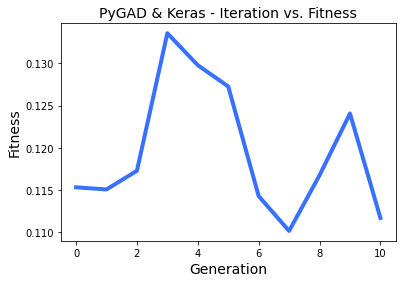

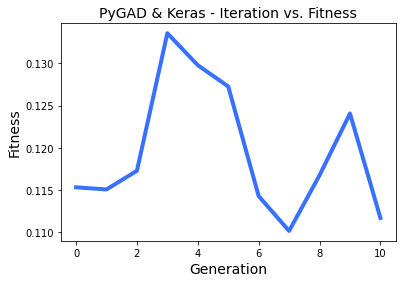

In [ ]:
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))


17/17 [==============================] - 21s 1s/step - loss: 0.6928 - accuracy: 0.4715 - val_loss: 0.7220 - val_accuracy: 0.0697
f1-score :  0.07131716999858216
count value :  89
fitness :  0.07131716999858216
17/17 [==============================] - 8s 419ms/step - loss: 0.6547 - accuracy: 0.5744 - val_loss: 0.4442 - val_accuracy: 0.8479
f1-score :  0.1264274061990212
count value :  90
fitness :  0.1264274061990212
17/17 [==============================] - 20s 1s/step - loss: 0.6929 - accuracy: 0.5182 - val_loss: 0.6851 - val_accuracy: 0.9374
f1-score :  0.09081527347781217
count value :  91
fitness :  0.09081527347781217
17/17 [==============================] - 8s 450ms/step - loss: 0.6931 - accuracy: 0.5051 - val_loss: 0.6760 - val_accuracy: 0.9640


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in long_scalars


f1-score :  nan
count value :  92
fitness :  nan
17/17 [==============================] - 19s 1s/step - loss: 0.6930 - accuracy: 0.5074 - val_loss: 0.6797 - val_accuracy: 0.9302
f1-score :  0.11040723981900454
count value :  93
fitness :  0.11040723981900454
17/17 [==============================] - 5s 215ms/step - loss: 0.6931 - accuracy: 0.5015 - val_loss: 0.6814 - val_accuracy: 0.5781
f1-score :  0.09697522419820642
count value :  94
fitness :  0.09697522419820642
17/17 [==============================] - 11s 568ms/step - loss: 0.6929 - accuracy: 0.4936 - val_loss: 0.6879 - val_accuracy: 0.7848
f1-score :  0.11816065192083819
count value :  95
fitness :  0.11816065192083819
17/17 [==============================] - 11s 611ms/step - loss: 0.6501 - accuracy: 0.5679 - val_loss: 0.4610 - val_accuracy: 0.8270
f1-score :  0.11739130434782609
count value :  96
fitness :  0.11739130434782609
Parameters of the best solution : [42 2 2 3 42 0.3 42 0.5 0.01]
Fitness value of the best solution = 0.

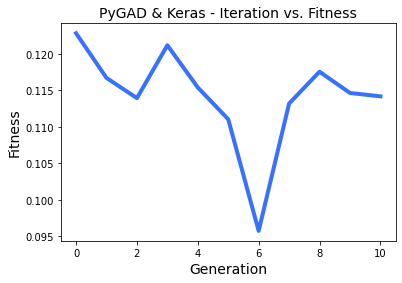

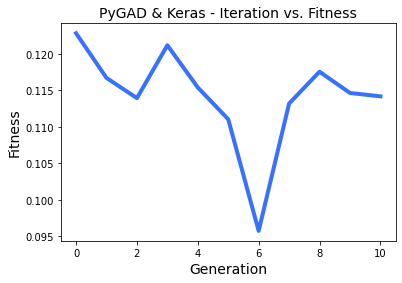

In [ ]:
# After the generations complete, some plots are showed that summarize how the outputs/fitness values evolve over generations.
ga_instance.plot_result(title="PyGAD & Keras - Iteration vs. Fitness", linewidth=4)

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import *
from keras.utils import np_utils
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import numpy
from tensorflow import keras
from sklearn.model_selection import RandomizedSearchCV
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import initializers

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

import tensorflow.keras
from keras.utils.vis_utils import plot_model

'''

no_of_kernel,kernel_size_1,kernel_size_2,pool_kernel_size,size_each_dense_layer_1,dropout_rate_1,size_each_dense_layer_2,dropout_rate_2,learning_rate
Parameters of the best solution : Parameters of the best solution : [42 2 2 3 42 0.3 42 0.5 0.01]

'''

model = Sequential()
model.add( Conv2D(filters=42,kernel_size=2,kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros(),activation='relu',
            input_shape=(2*ws+1,X_train_images.shape[2],1) ) )
model.add( Conv2D(filters=42,kernel_size=2,kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros(),activation='relu') ) 
model.add( MaxPool2D( pool_size=3) )
model.add(Flatten())
model.add(Dense(units=42,kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros(),activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(units=42,kernel_initializer=initializers.RandomNormal(stddev=0.01), bias_initializer=initializers.Zeros(),activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(1, activation='sigmoid'))
    
model.summary()
#plot_model(model, to_file='model_plot.png') 
model.compile(optimizer=keras.optimizers.Adam(0.01),loss='binary_crossentropy', metrics='accuracy' )



Model: "sequential_475"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_950 (Conv2D)          (None, 8, 74, 42)         210       
_________________________________________________________________
conv2d_951 (Conv2D)          (None, 7, 73, 42)         7098      
_________________________________________________________________
max_pooling2d_475 (MaxPoolin (None, 2, 24, 42)         0         
_________________________________________________________________
flatten_475 (Flatten)        (None, 2016)              0         
_________________________________________________________________
dense_1425 (Dense)           (None, 42)                84714     
_________________________________________________________________
dropout_950 (Dropout)        (None, 42)                0         
_________________________________________________________________
dense_1426 (Dense)           (None, 42)             

In [ ]:
model.fit( X_train_images, y_train_images, epochs=10, validation_data=(X_test_images,y_test_images) )

Epoch 1/10
64/64 [==============================] - 10s 132ms/step - loss: 0.6254 - accuracy: 0.5896 - val_loss: 0.9322 - val_accuracy: 0.5767
Epoch 2/10
64/64 [==============================] - 7s 116ms/step - loss: 0.3948 - accuracy: 0.8260 - val_loss: 2.5772 - val_accuracy: 0.2960
Epoch 3/10
64/64 [==============================] - 7s 115ms/step - loss: 0.2779 - accuracy: 0.8971 - val_loss: 2.0718 - val_accuracy: 0.4548
Epoch 4/10
64/64 [==============================] - 7s 114ms/step - loss: 0.3450 - accuracy: 0.8315 - val_loss: 2.3247 - val_accuracy: 0.2891
Epoch 5/10
64/64 [==============================] - 7s 115ms/step - loss: 0.1797 - accuracy: 0.9092 - val_loss: 3.7165 - val_accuracy: 0.2507
Epoch 6/10
64/64 [==============================] - 7s 115ms/step - loss: 0.1875 - accuracy: 0.9049 - val_loss: 3.8320 - val_accuracy: 0.2727
Epoch 7/10
64/64 [==============================] - 7s 115ms/step - loss: 0.1219 - accuracy: 0.9352 - val_loss: 8.8156 - val_accuracy: 0.1145
Epoch

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = np.round(    model.predict(X_test_images), 0  )
print( confusion_matrix(y_test_images, y_pred ) )

[[ 3465 10110]
 [   46   461]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test_images, y_pred).ravel()
print(tn, fp, fn, tp)

# accuracy :
acc = (tp + tn) / (tp + fp + fn + tn)
print('Accuracy : ',"{:.2f}".format(acc) )

# sensitivity :
sen = tp / (tp + fn)
print('Sensitivity : ',"{:.2f}".format(sen) )

# specificity :
spec = tn / (fp + tn)
print('Specificity : ',"{:.2f}".format(spec) )


# mcc :
import math
mcc = (tp * tn - fp * fn) / math.sqrt( (tp+fp) * (fn+tn) * (fp+tn) * (tp+fn) )
print('MCC : ',"{:.2f}".format(mcc) ) 

# f1-score :
# recall -> sen
pre = tp/(tp+fp)
f1_score = (2*pre*sen) / (pre + sen)
print('f1-score : ',"{:.2f}".format(f1_score) )


3465 10110 46 461
Accuracy :  0.28
Sensitivity :  0.91
Specificity :  0.26
MCC :  0.07
f1-score :  0.08
